# How reliable are Fandango's movie rates?

This project is a part of the "Statistics" course on DataQuest.io. It looks into an American website Fandango that is an online aggregator of movie ratings. According to the study of Walt Hickey (a data journalist), Fandango's rating system was inaccurate and biased. In his article titled "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (October 2015), Walt presented strong evidence of inconsistency between the movie rates published on the Fandango's website and the actual rating that could be found in the HTML of the website. Many of the ratings were falsely inflated by exaggerated rounding up.

After the mentioned article was published, Fandango claimed that the issue was caused by a bug that has been fixed and ratings appearing on the website are correct. Nevertheless, it is impossible to verify that statement, since the actual ratings are no longer available in the HTML.

The goal of this project is to investigate whether the movie rating was in fact corrected, by comparing two datasets, one representing the movie ratings before the article was published and another dated after the article.

## Data Setup

In order to conduct the analysis of Fandango's movie ratings, I need to have two datasets, collected at two points in time for comparison. Luckily there are publicly available data:

1) Dataset collected by Walt Hickey, representing the movie ratings before his article was published, available on GitHub. (https://github.com/fivethirtyeight/data/tree/master/fandango)

2) Dataset collected by Dataquest's team member, representing movie ratings for films released in 2016 and 2017 (so after the Hickey's analysis), available on GitHub. 
(https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
# Import libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Datasets
previous_rating = pd.read_csv("fandango_score_comparison.csv")
after_rating = pd.read_csv("movie_ratings_16_17.csv")

Names of the datasets represent the points of time they were collected. "Previous_rating" refers to movie rating collected at the time before the Hickey's article was published, and "after_rating" represents data collected after the mentioned article.

In [3]:
# Examine data
previous_rating.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
# Examine data
after_rating.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Both datasets contain many variables, some of them irrelevant for my analysis. For simplicity I will extract only important and needed columns.

In [5]:
# Select the columns under analysis
previous= previous_rating[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference', 'IMDB_norm', 'RT_user_norm']].copy()
after = after_rating[['movie', 'year', 'fandango', 'n_imdb', 'n_audience']].copy()

In [6]:
# Rename columns
previous.rename(columns = {'IMDB_norm':'imdb', 'RT_user_norm':'RottenTomatoes'}, inplace = True)
after.rename(columns = {'n_imdb':'imdb', 'fandango':'fandango_stars', 'n_audience':'RottenTomatoes'}, inplace = True)

One of the important steps in setting up data for analysis is determining whether the collected samples are representative in comparison to the true population. This is an essential assumption as failing in obtaining the right sample may result in creating a sample error and therefore lead to obtaining wrong conclusions.

Analyzing "README.md" ob both data set's repositories I could identify criteria used for the collection of the data. For the first dataset (previous_rating) movies were chosen only if:

- had 30 or more fan ratings on the Fandango's page (at the time of data collection, that is 24th of August 2015),
- had tickets on sale in the year 2015.

The sampling that follows the criteria above was not random since not all movies had the same probability of being chosen (like for example those who did not manage to collect at least 30 ratings). This puts in question the representativeness of the population by the dataset. Collected data may be biased by temporal trends, like the economy of 2015 that could affect the quality of the movies and therefore the ratings.

The second dataset's (after_rating) collection criteria were as follow:

- release date of the movie was 2016 or later,
- the movie had a considerable number of votes and reviews (not defined the exact number).

This sampling also created biased data that is subject to temporal trends and most probably is not representative of the population in question.

Both datasets were collected with specific goals in mind, and the criteria used helped in obtaining a right, representative sample for the original analysis. Such a sampling method is known as purposive sampling (also called selective/subjective sampling). Unfortunately, for my analysis those samples would create biased conclusions, that is why I will have to adapt the goal of my analysis to be able to use those datasets.

## Adapting the project's goal

As was explained above, data I am using for this analysis was not sampled randomly, which may result in biased analysis and inconsistent results. Since it is impossible to sample a new dataset (I cannot go back in time and get data before Hickey's article) I will have to adjust the aim of this project. I will focus my analysis on comparing Fandango's ratings for popular films from the year 2015 and ratings for popular films of 2016. This is a close proxy for my initial goal.

## Isolating the relevant Data

Applying the new goal, we have to define two populations analyzed in this project:
- Fandango's movie ratings, for all popular films released in 2015
- Fandango's movie ratings, for all popular films released in 2016

To ger rid of any ambiguity, I will define the "popular film", as one that has 30 or more fan ratings on Fandango's webpage. This is the same criterion that Hickey was using, that is why the first dataset is ready to be used. However, I have to verify whether the second dataset follows a similar pattern. Firstly, I will sample random ten movies and verify a number of ratings.

In [7]:
random_films = after.sample(10, random_state = 1)

At the official Fandango's website, I have confirmed the fan ratings for the randomly chosen movies. It is worth mentioning that at the moment of this project creation (May 2020), Fandango's is cooperating with the Rotten Tomatoes website and is using their ratings as a benchmark for the movie rates. At this time, the movie "Genius" does not have displayed any fan ratings on the website. Nevertheless, I have confirmed with the Dataquest team member who collected the data for this project, the fan rating number for April 2018, and that is the number shown in the table.

In [8]:
random_films["fan_votes"] = [25.608, 31.532, 6.825, 30.617, 87.793, 3.807, 127, 48.458, 10.211, 179.806]

In [9]:
random_films

,movie,year,fandango_stars,imdb,RottenTomatoes,fan_votes
108,Mechanic: Resurrection,2016,4.0,2.80,2.05,25.608
206,Warcraft,2016,4.0,3.50,3.55,31.532
106,Max Steel,2016,3.5,2.30,1.90,6.825
107,Me Before You,2016,4.5,3.70,3.65,30.617
51,Fantastic Beasts and Where to Find Them,2016,4.5,3.75,4.05,87.793
33,Cell,2016,3.0,2.15,0.80,3.807
59,Genius,2016,3.5,3.25,2.25,127.000
152,Sully,2016,4.5,3.75,4.25,48.458
4,A Hologram for the King,2016,3.0,3.05,2.85,10.211
31,Captain America: Civil War,2016,4.5,3.95,4.45,179.806


I will also double check the consistency of the ratings for the "previous" dataset.

In [10]:
sum(previous["Fandango_votes"] < 30)

0

Having adjusted data for one of the criterion, the popularity of the movies, it is time to verify if other criteria also holds. That is, I will isolate the movies for the relevant years, 2015 and 2016.
First, I will verify the years in Hickey's data set.

In [11]:
previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,imdb,RottenTomatoes
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.90,4.3
1,Cinderella (2015),5.0,4.5,12640,0.5,3.55,4.0
2,Ant-Man (2015),5.0,4.5,12055,0.5,3.90,4.5


As the table shows, there is no specific column for the release year, that could be used for the data isolation. However, I can extract this information from the variable "FILM"

In [12]:
previous["Year"] = previous["FILM"].str[-5:-1]
previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,imdb,RottenTomatoes,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.90,4.3,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,3.55,4.0,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,3.90,4.5,2015


Next, I will analyse what years are included in this dataser.

In [13]:
previous["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [14]:
fandango_15 = previous[previous["Year"]== "2015"].copy()
fandango_15["Year"].value_counts()

2015    129
Name: Year, dtype: int64

I have isolated movies that correspond to my criteria list, movies with 30 or more fan ratings and released in 2015.
Now I will adjust the "after" dataset.

In [15]:
after.head(3)

,movie,year,fandango_stars,imdb,RottenTomatoes
0,10 Cloverfield Lane,2016,3.5,3.60,3.95
1,13 Hours,2016,4.5,3.65,4.15
2,A Cure for Wellness,2016,3.0,3.30,2.35


In [16]:
after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
fandango_16 = after[after["year"]== 2016].copy()
fandango_16["year"].value_counts()

2016    191
Name: year, dtype: int64

## Contrasting Distributions for 2015 vs 2016

The goal of this project is to analyze whether there is any difference between Fandango's popular movie ratings in 2015 and 2016. I will start the comparison by visualizing the distributions of both samples using the kernel density plots.

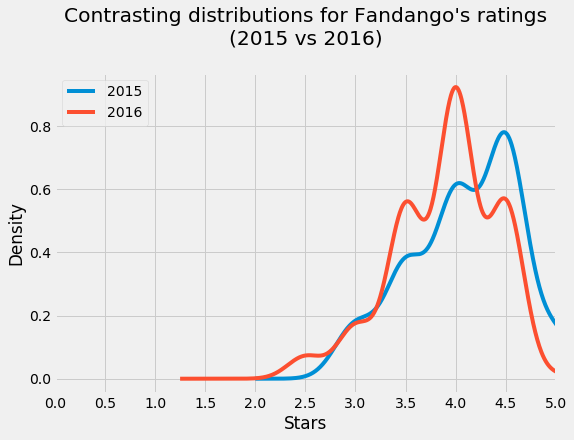

In [18]:
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_15['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_16['fandango_stars'].plot.kde(label = '2016', legend = True)

plt.title("Contrasting distributions for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

Analyzing the distribution above, it is easy to observe that:

- both distributions for 2015 and 2016 are skewed to the left
- distribution of 2016 movie ratings is shifted to the left in comparison to the 2015 distribution

The skewness of the distributions indicates that most of the movies have very high fan ratings. In 2015 it appears that there were no movies with a rating below the middle 2.5 stars. The fact that website Fandango, despite rating movies also sells tickets to see them, brings doubt in the light of conflict of interests. 

The significant difference between both distributions is the shift to the left of the ratings for the year 2016. This implies that in fact, ratings for the popular movies were different in 2016 comparing to 2015. To be exact, ratings in 2016 were significantly smaller than those in 2015, having the most common rate of 4 stars (out of 5), while in 2015 most common rate was 4.5.

Going deeper into the analysis I will compare frequency tables of the two distributions. Since both datasets have a different amounts of movies, I'll normalize the tables and present the percentages.

In [19]:
print("2015" + "\n" + "-" * 16) 
fandango_15["Fandango_Stars"].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [20]:
print("2016" + "\n" + "-" * 16)
fandango_16["fandango_stars"].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango_stars, dtype: float64

Comparing both tables I can confirm the observations I've made earlier analyzing the distribution graph. First of all, the minimum rating in 2016 (2.5 stars) was lower than in 2015 (3 stars). On the other hand, the maximum of 5 stars in 2015 was awarded to almost 7% of all the movies, while in 2016 to only 0.5%. Similar patterns are observed in the second-best rating of 4.5 stars.

There were two ratings for which the percentage increased in 2016, which is 3.5 and 4.0 stars, which challenges the left shift of the 2016 distribution.

## Identifying the direction of the shift

The next step in the analysis will be the comparison of summary statistic metrics: mean, median, mode. I will get a broad picture of the difference and direction of the change between the movie ratings in 2015 and 2016.

In [21]:
# computing means for both samples
mean_15 = fandango_15['Fandango_Stars'].mean()
mean_16 = fandango_16['fandango_stars'].mean()

# computing medians for both samples
median_15 = fandango_15['Fandango_Stars'].median()
median_16 = fandango_16['fandango_stars'].median()

# computing modes for both samples
mode_15 = fandango_15['Fandango_Stars'].mode()[0] 
mode_16 = fandango_16['fandango_stars'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


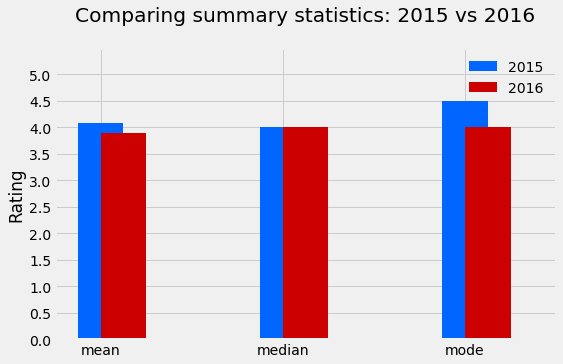

In [22]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Rating')
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

In [23]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

The bar graph above clearly shows, that even the median is the same for both distributions, the mean and the mode are higher for the sample of 2015. This finding confirms that on average, popular films released in 2016 were getting less stars that popular films released in 2015.

## Conclusions

My analysis demonstrated that there is a visible difference between Fandango's popular movie rating in 2015 and 2016. It is also confirmed that on average the ratings of popular movies released in 2016 are lower (had fewer stars) that those released in 2015.

Unfortunately, given the data available, I cannot deduct whether the change was due to the Fandangos reaction to Hickey's article, or due to the lower quality movies in 2016.